# Plots for the control experiments 
Here, the results of the analysis of the automated fly tracking (see "analyze_tracking.ipynb") and the song/vibration analysis (see "analyze_song_vibration.ipynb") are plotted for the control experiments. 

Author: Bjarne Schultze <br>
Last modified: 29.11.2024

In [ ]:
# Necessary modules import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb

import modules.plotting_utils as myplt
import modules.data_handling_utils as dutils

plt.style.use('./plotstyle_bjarne.mplstyle')

In [2]:
# Choose an experimental group
exp_grp1 = "vPR13_ctrl"
exp_grp2 = "CsChrimson_ctrl"

#### Preparations
Loading the data, extracting the indices

In [3]:
# Define colors
vib_col = to_rgb("#04A83D")   # '#46A81F'
pulse_col = to_rgb("#ff0000")  # '#5D11AD' 
sine_col = to_rgb("#2d7cff")  # '#F07236' 
sine_col_light = to_rgb("#78CEFF")
pulse_col_light = to_rgb("#FF776F")
vib_col_light = to_rgb("#7DD189")
cmap = ListedColormap([(1.0,1.0,1.0),sine_col,pulse_col,vib_col])

In [4]:
# For the normal protocol (all other conditions)
with open("../additional_files/opto_calibration_26_4.txt") as f:
    lines = f.readlines()
opto_calib = np.sort(np.array([ txt.removesuffix('\n').split(',') for txt in lines ]).astype('float'), axis=0)
stim_len = 4

In [5]:
# Load the results from the analysis of the annotations 
datadict_an1 = dutils.read_hdf_to_dict(f"../additional_files/{exp_grp1}_results.hdf5")
datadict_an2 = dutils.read_hdf_to_dict(f"../additional_files/{exp_grp2}_results.hdf5")
# Get number of experiments
number_exp1 = datadict_an1["male/all_changes_cntd"].shape[0]
number_exp2 = datadict_an2["male/all_changes_cntd"].shape[0]

# Get the raster matrices
time_vec = datadict_an1["male/raster_mat_time"]
r_mat_p1 = datadict_an1["male/raster_mat_pulse"]
r_mat_s1 = datadict_an1["male/raster_mat_sine"]
r_mat_v1 = datadict_an1["male/raster_mat_vibration"]

r_mat_p2 = datadict_an2["male/raster_mat_pulse"]
r_mat_s2 = datadict_an2["male/raster_mat_sine"]
r_mat_v2 = datadict_an2["male/raster_mat_vibration"]

# Calculate PSTHs from the raster matrices (number of trials with signal divided by number of all trials)
hist_p1 = hist = np.mean((r_mat_p1 > 0).astype('int'), axis=0)
hist_s1 = hist = np.mean((r_mat_s1 > 0).astype('int'), axis=0)
hist_v1 = hist = np.mean((r_mat_v1 > 0).astype('int'), axis=0)

hist_p2 = hist = np.mean((r_mat_p2 > 0).astype('int'), axis=0)
hist_s2 = hist = np.mean((r_mat_s2 > 0).astype('int'), axis=0)
hist_v2 = hist = np.mean((r_mat_v2 > 0).astype('int'), axis=0)

# Get the stimulus volts
stim_volts1 = datadict_an1["male/raster_mat_stimuli"]
stim_volts2 = datadict_an2["male/raster_mat_stimuli"]

In [6]:
# Load the results from the analysis of the annotations 
datadict1 = dutils.read_hdf_to_dict(f"../additional_files/{exp_grp1}_tracks.hdf5")
datadict2 = dutils.read_hdf_to_dict(f"../additional_files/{exp_grp2}_tracks.hdf5")
# Get number of experiments
number_exp1 = datadict1["male/change_velocity_male"].shape[0]
number_exp2 = datadict2["male/change_velocity_male"].shape[0]

# Extract the changes in the tracking metrics upon activation
change_velo1 = datadict1['male/change_velocity_male']
change_velo2 = datadict2['male/change_velocity_male']

change_wingang1 = datadict1['male/change_wingangle']
change_wingang2 = datadict2['male/change_wingangle']

# Extract the mean tracking traces
mean_tracks_m1 = datadict1['male/med_tracks_male']
mean_tracks_m2 = datadict2['male/med_tracks_male']

# Get the indices for the metrics
index_metrics = datadict1['male/med_tracks_male_index'].astype("str")

In [7]:
# Store the audio and tracking sampling rates
sampling_rate = 10000    # [Hz]
sampling_rate_tracking = 1000   # [Hz]

# Create time vector
time_vec_tracks = np.arange(-5, 9, 1/sampling_rate_tracking)

# Define a set of colors
m_col = "darkcyan"
m_sol_col = "skyblue"
f_col = "firebrick"

In [8]:
# Get indices for certain metrics
velo_idx = np.where(index_metrics == "velocity_forward")[0][0]
accmag_idx = np.where(index_metrics == "acceleration_mag")[0][0]
wingang_idx = np.where(index_metrics == "wing_angle_sum")[0][0]
wing_sum_idx = np.where(index_metrics == "wing_angle_sum")[0][0]

In [9]:
# Load the test results
test_res = pd.read_csv("E:/MT/additional_files/test_results_tracking_changes.csv")
# Set the alpha threshold 
alpha_threshold = 0.05

# Split the test results per condition (m/mf)
test_res_m1 = test_res.loc[np.logical_and(test_res["condition"] == "m", test_res["group"] == exp_grp1), :]
test_res_m2 = test_res.loc[np.logical_and(test_res["condition"] == "m", test_res["group"] == exp_grp2), :]

# Combine all results for velocity changes for plotting
effect_velo_changes1 = test_res_m1.loc[test_res_m1["chg_type"] == "change_velocity", "pvalue"].to_numpy() < alpha_threshold
effect_velo_changes2 = test_res_m2.loc[test_res_m2["chg_type"] == "change_velocity", "pvalue"].to_numpy() < alpha_threshold

# COmbine results for wing angle changes
effect_wingang1 = test_res_m1.loc[test_res_m1["chg_type"] == "change_wingangle", "pvalue"].to_numpy()  < alpha_threshold
effect_wingang2 = test_res_m2.loc[test_res_m2["chg_type"] == "change_wingangle", "pvalue"].to_numpy()  < alpha_threshold

#### Create the plots for the tracking
-- thesis plot --

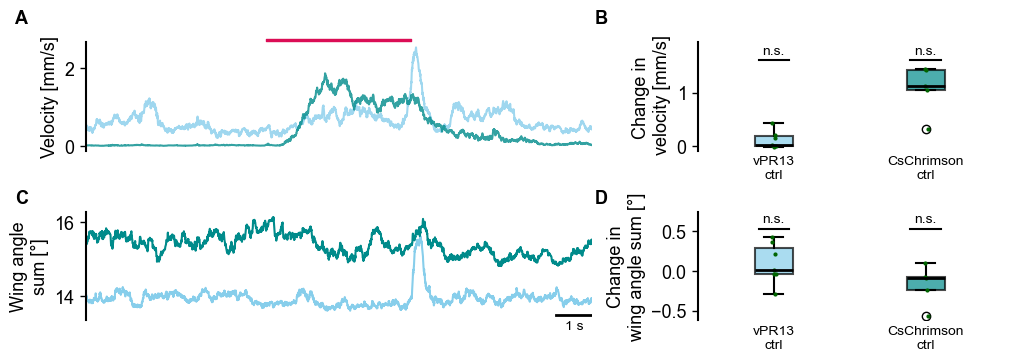

In [10]:
# Set up a new figure 
fig, ax_dict = plt.subplot_mosaic([["A", "A", "A", "A", "A", "B", "B", "B"], 
                                   ["C", "C", "C", "C", "C", "D", "D", "D"]], figsize=(10,3.5), constrained_layout=False)
# Get the axes handles for the single axes
axa = ax_dict["A"]
axb = ax_dict["B"]
axc = ax_dict["C"]
axd = ax_dict["D"]


# Plot the averaged forward velocities
axa.plot(time_vec_tracks, mean_tracks_m1[:, velo_idx], label="Forward vel. vPR13 control", color=m_sol_col, alpha=0.8)
axa.plot(time_vec_tracks, mean_tracks_m2[:, velo_idx], label="Forward vel. CsChrimson control", color=m_col, alpha=0.8)
# Add stimulus bar
myplt.add_stim_bar(axa, stim_period=[0, stim_len])
# Add label
axa.set_ylabel("Velocity [mm/s]")
axa.set_xticklabels([])
axa.set_title("A", x=-0.14, y=1.1) 


# Add boxplots showing the changes
myplt.boxplot_dp([change_velo1, change_velo2], 
                 labels=["vPR13\nctrl", "CsChrimson\nctrl"], boxcolor=[m_sol_col, m_col], ax=axb, markercolor="darkgreen", 
                 markersize=2, std_dp=0.01, boxwidth=0.25)
myplt.add_significance_stars(axb, [effect_velo_changes1[0], effect_velo_changes2[0]], [1, 2, 3], textpad=0.14)
# Adjust and label the axes
axb.spines["bottom"].set_visible(False)
axb.tick_params(axis="x", length=0.0, labelsize=10)
axb.set_ylim(top=axb.get_ylim()[-1]*1.1)
axb.set_ylabel("Change in\n velocity [mm/s]")
axb.set_title("B", x=-0.34, y=1.1)


# Plot the averaged wing angle sum
axc.plot(time_vec_tracks, mean_tracks_m1[:, wing_sum_idx], color=m_sol_col, label="Male (vPR13 ctrl)")
axc.plot(time_vec_tracks, mean_tracks_m2[:, wing_sum_idx], color=m_col, label="Male (CsChrimson ctrl)")
# Add lables
axc.set_ylabel("Wing angle\nsum [°]")
axc.set_title("C", x=-0.14)

# Add boxplots showing the change
myplt.boxplot_dp([change_wingang1, change_wingang2], labels=["vPR13\nctrl", "CsChrimson\nctrl"], 
                 boxcolor=[m_sol_col, m_col], ax=axd, markercolor="darkgreen", markersize=2, std_dp=0.01, boxwidth=0.25)
myplt.add_significance_stars(axd, [effect_wingang1[0], effect_wingang2[0]], [1, 2], textpad=0.14)
# Modify axes and add label
axd.set_ylim(top=axd.get_ylim()[-1]*1.15)
axd.set_ylabel("Change in\nwing angle sum [°]")
axd.spines["bottom"].set_visible(False)
axd.tick_params(axis="x", length=0.0, labelsize=10)
axd.set_title("D", x=-0.34)

# Replace x axes by scale bar
myplt.axis_to_scale(axc, "s", linewidth=2, txt_offset=0.15)
axa.set_xticks([])
axa.spines["bottom"].set_visible(False)

# Adjust subplot grid
plt.subplots_adjust(wspace=10, hspace=0.4, left=0.075, right=0.999, top=0.90, bottom=0.1)

# Save the figure
fig.savefig("../figures_wip/controls/controls_tracking.pdf")

Plot all tracking metrics

 -- absolute metrics --

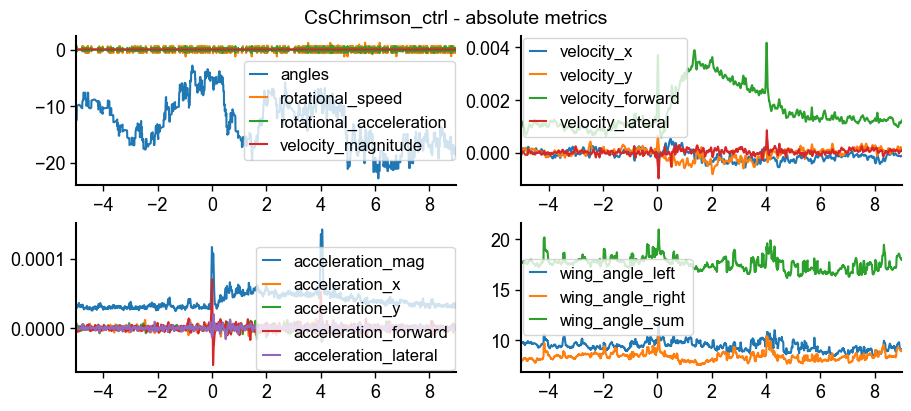

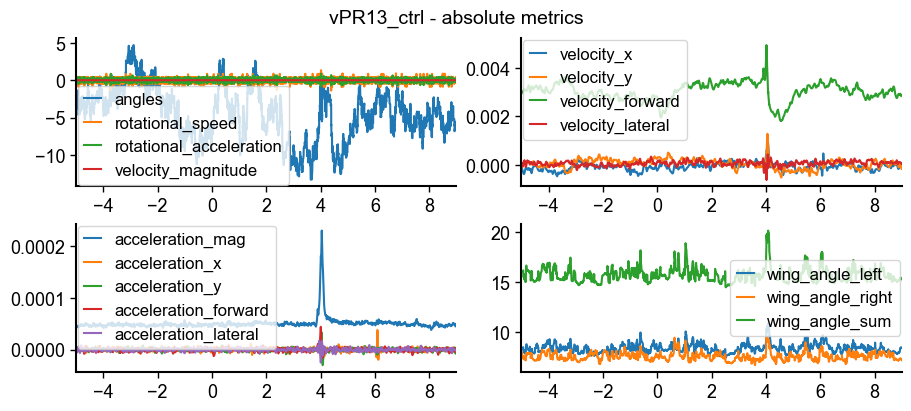

In [26]:
# Set up a figure for the averaged absolute measures of the female
fig2, ax2 = plt.subplots(2, 2, figsize=(9,4))
fig2.suptitle(f"{exp_grp2} - absolute metrics", fontsize=14)
ax2 = ax2.flatten()

# Plot the averaged metrics
ax2[0].plot(time_vec, mean_tracks_m2[:,:4])
ax2[1].plot(time_vec, mean_tracks_m2[:,4:8])
ax2[2].plot(time_vec, mean_tracks_m2[:,8:13])
ax2[3].plot(time_vec, mean_tracks_m2[:,13:])
# Add legends
ax2[0].legend(index_metrics[:4])
ax2[1].legend(index_metrics[4:8])
ax2[2].legend(index_metrics[8:13])
ax2[3].legend(index_metrics[13:])

# Save figure
# fig2.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking_mf_female_abs.pdf")

# Set up a figure for the averaged absolute measures of the male (solitary condition)
fig3, ax3 = plt.subplots(2, 2, figsize=(9,4))
fig3.suptitle(f"{exp_grp1} - absolute metrics", fontsize=14)
ax3 = ax3.flatten()

# Plot the averaged metrics
ax3[0].plot(time_vec, mean_tracks_m1[:,:4])
ax3[1].plot(time_vec, mean_tracks_m1[:,4:8])
ax3[2].plot(time_vec, mean_tracks_m1[:,8:13])
ax3[3].plot(time_vec, mean_tracks_m1[:,13:])
# Add legends
ax3[0].legend(index_metrics[:4])
ax3[1].legend(index_metrics[4:8])
ax3[2].legend(index_metrics[8:13])
ax3[3].legend(index_metrics[13:])

# Save figure
# fig3.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_tracking_m_male_abs.pdf")

-- presentation plots --

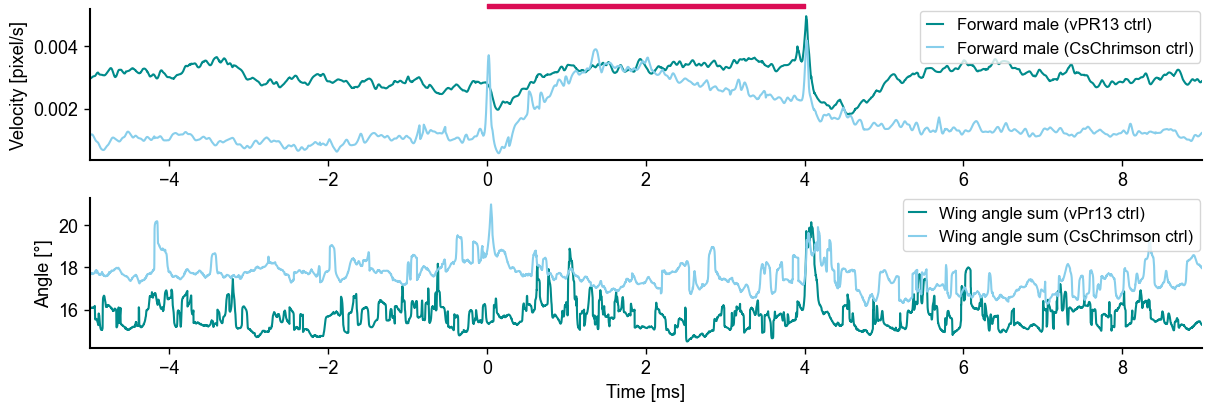

In [28]:
# Set up a figure for the averaged absolute measures of the male
fig, ax = plt.subplots(2, 1, figsize=(12,4))
ax = ax.flatten()

# Plot the averaged metrics 
ax[0].plot(time_vec, mean_tracks_m1[:, velo_idx], label="Forward male (vPR13 ctrl)", color=m_col)
ax[0].plot(time_vec, mean_tracks_m2[:, velo_idx], label="Forward male (CsChrimson ctrl)", color=m_sol_col)
ax[1].plot(time_vec, mean_tracks_m1[:, wingang_idx], label="Wing angle sum (vPr13 ctrl)", color=m_col)
ax[1].plot(time_vec, mean_tracks_m2[:, wingang_idx], label="Wing angle sum (CsChrimson ctrl)", color=m_sol_col)
# Add legends
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

ax[1].set_xlabel("Time [ms]")
ax[0].set_ylabel("Velocity [pixel/s]")
ax[1].set_ylabel("Angle [°]")

# Add a bar for the stimulation period
myplt.add_stim_bar(ax[0], [0, stim_len])

# Save figure
# fig.savefig(f"../figures_wip/{exp_grp}/presi_{exp_grp}_tracking.png")

#### Create the plots for the annotation analysis

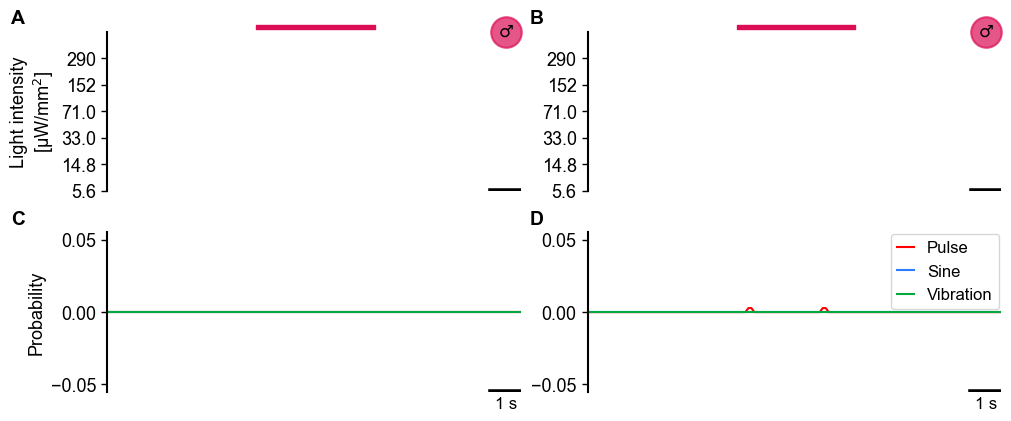

In [21]:
# Create tiled layout with specific arrangement
fig, ax = plt.subplots(2, 2, figsize=(10,4.1))
ax = ax.flatten()

# Solitary male condition (raster: top, PSTH: bottom)
myplt.raster_plot([r_mat_s1,r_mat_p1,r_mat_v1], time_vec, stim_volts1, 
                labels=['Sine','Pulse','Vibrations'], colors=[sine_col,pulse_col,vib_col], ax=ax[0], legend_off=True, 
                stim_watts=opto_calib[:,1], stim_period=[0,stim_len], alpha=0.7)
myplt.psth_plot(time_vec, [hist_p1,hist_s1,hist_v1], [pulse_col, sine_col, vib_col], 
                ['Pulse','Sine','Vibration'], ax=ax[2], stim_period=[0,stim_len], 
                stim_bar=False, legend_off=True)
# Male-female condition (raster: top, PSTH: bottom)
myplt.raster_plot([r_mat_s2,r_mat_p2,r_mat_v2], time_vec, stim_volts2, 
                labels=['Sine','Pulse','Vibrations'], colors=[sine_col,pulse_col,vib_col], ax=ax[1], legend_off=True, 
                stim_watts=opto_calib[:,1], stim_period=[0,stim_len], alpha=0.7)
myplt.psth_plot(time_vec, [hist_p2,hist_s2,hist_v2], [pulse_col, sine_col, vib_col], 
                ['Pulse','Sine','Vibration'], ax=ax[3], legend_off=False, 
                stim_period=[0,stim_len], stim_bar=False)

# Make y limits equal for the lower subplots and add a bar for the stimulation to the upper ones
myplt.equal_axlims(ax[2:])
myplt.add_stim_bar(ax[:2], stim_period=[0,stim_len])

# Remove the ticklabels for upper plots (x) and right plots (y)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

# Get current y labels
ylabels_new0 = ax[0].get_yticklabels()
ylabels_new1 = ax[1].get_yticklabels()
# Remove trailing zeros
_ = [ ylbl.set_text(round(float(ylbl.get_text()))) for ylbl in ylabels_new0 if float(ylbl.get_text()) >= 100 ]
_ = [ ylbl.set_text(round(float(ylbl.get_text()))) for ylbl in ylabels_new1 if float(ylbl.get_text()) >= 100 ]
# Set changed y labels
ax[0].set_yticklabels(ylabels_new0)
ax[1].set_yticklabels(ylabels_new1)

# Label plots
ax[2].set_ylabel('Probability')
ax[0].set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")

# Set the subpot titles
ax[0].set_title("A", x=-0.233, y=1.0, fontsize=14)
ax[1].set_title("B", x=-0.14, y=1.0, fontsize=14)
ax[2].set_title("C", x=-0.233, y=1.0, fontsize=14)
ax[3].set_title("D", x=-0.14, y=1.0, fontsize=14)

# Replace x axes by scale bars
myplt.axis_to_scale(ax[0], None, fontsize=12)
myplt.axis_to_scale(ax[1], None, fontsize=12)
myplt.axis_to_scale(ax[2], "s", fontsize=12, txt_offset=0.003)
myplt.axis_to_scale(ax[3], "s", fontsize=12, txt_offset=0.003)

# Add pictograms showing the experimental condition
myplt.add_condition_pictogram(ax[0], "m", x=ax[0].get_xlim()[-1] - 0.5, y=ax[0].get_ylim()[-1])
myplt.add_condition_pictogram(ax[1], "m", x=ax[1].get_xlim()[-1] - 0.5, y=ax[1].get_ylim()[-1])

# Save the figure
fig.savefig("../figures_wip/controls/controls_psth_raster.pdf")